<a href="https://colab.research.google.com/github/vspin25/acute_inflammation/blob/main/EDA_Final_proyect_(acute_inflammation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Acute Inflammations**
Dataset https://archive.ics.uci.edu/dataset/184/acute+inflammations

# EDA

Libraries

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder


Dataset

In [ ]:
uploaded = files.upload()

Saving Acute_Inflammations.xlsx to Acute_Inflammations (1).xlsx


In [ ]:
dataset = pd.read_excel('Acute_Inflammations.xlsx')

See how dataset looks like

In [ ]:
print(dataset.head())

  temperature nausea lumbar-pain urine-pushing micturition-pains  \
0        35,5     no         yes            no                no   
1        35,9     no          no           yes               yes   
2        35,9     no         yes            no                no   
3        36,0     no          no           yes               yes   
4        36,0     no         yes            no                no   

  burning-urethra bladder-inflammation nephritis  
0              no                   no        no  
1             yes                  yes        no  
2              no                   no        no  
3             yes                  yes        no  
4              no                   no        no  


Missing Values

In [ ]:
dataset.isnull().sum()

,0
temperature,0
nausea,0
lumbar-pain,0
urine-pushing,0
micturition-pains,0
burning-urethra,0
bladder-inflammation,0
nephritis,0


Statistics

In [ ]:
dataset.describe()

,temperature,nausea,lumbar-pain,urine-pushing,micturition-pains,burning-urethra,bladder-inflammation,nephritis
count,120,120,120,120,120,120,120,120
unique,44,2,2,2,2,2,2,2
top,"37,0",no,yes,yes,no,no,no,no
freq,8,91,70,80,61,70,61,70


Convert temperature column to numerical (replace ',' with '.')

In [ ]:
dataset['temperature'] = dataset['temperature'].str.replace(',', '.')

dataset['temperature'] = pd.to_numeric(dataset['temperature'])

dataset['temperature'].head()

,temperature
0,35.5
1,35.9
2,35.9
3,36.0
4,36.0


Statistics of temperature (numerical)


In [ ]:
dataset.describe()

,temperature
count,120.000000
mean,38.724167
std,1.819132
min,35.500000
25%,37.100000
50%,37.950000
75%,40.600000
max,41.500000


Change temperature to categorical variable


*   hypothermia: less than 36.2 (not including 36.2)
*   normal: 36.2-37.4
*   fever: more than 37.5 (including 37.5)


In [ ]:
bins = [0, 36.2, 37.5, 42]
labels = ['hypothermia', 'normal', 'fever']
dataset['temperature'] = pd.cut(dataset['temperature'], bins=bins, labels=labels, right=False)

print(dataset)

     temperature nausea lumbar-pain urine-pushing micturition-pains  \
0    hypothermia     no         yes            no                no   
1    hypothermia     no          no           yes               yes   
2    hypothermia     no         yes            no                no   
3    hypothermia     no          no           yes               yes   
4    hypothermia     no         yes            no                no   
..           ...    ...         ...           ...               ...   
115        fever     no         yes           yes                no   
116        fever     no          no            no                no   
117        fever    yes         yes            no               yes   
118        fever     no         yes           yes                no   
119        fever     no         yes           yes                no   

    burning-urethra bladder-inflammation nephritis  
0                no                   no        no  
1               yes                  yes 

Statistics of temperature (categorical)

In [ ]:
dataset['temperature'].describe()

,temperature
count,120
unique,3
top,fever
freq,81


**PLOTS**

Temperature Distribution

<ipython-input-35-b4fd6951a296>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataset, palette="coolwarm")


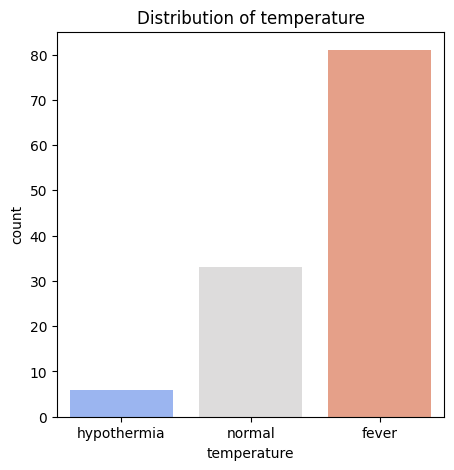

In [ ]:
Temperature_cat = ['temperature']

for col in Temperature_cat:
    plt.figure(figsize=(5, 5))
    sns.countplot(x=col, data=dataset, palette="coolwarm")
    plt.title(f"Distribution of {col}")
    plt.show()



Temperature categories count

In [ ]:
dataset['temperature'].value_counts()

,count
temperature,
fever,81
normal,33
hypothermia,6


Binary features count

In [ ]:
Binary_columns = ['nausea','lumbar-pain','urine-pushing', 'micturition-pains', 'burning-urethra']
for col in Binary_columns:
    print(dataset[col].value_counts())

nausea
no     91
yes    29
Name: count, dtype: int64
lumbar-pain
yes    70
no     50
Name: count, dtype: int64
urine-pushing
yes    80
no     40
Name: count, dtype: int64
micturition-pains
no     61
yes    59
Name: count, dtype: int64
burning-urethra
no     70
yes    50
Name: count, dtype: int64


Binary features distribution

<ipython-input-38-24065950f0fb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataset, palette="Paired")
<ipython-input-38-24065950f0fb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataset, palette="Paired")
<ipython-input-38-24065950f0fb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataset, palette="Paired")
<ipython-input-38-24065950f0fb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set 

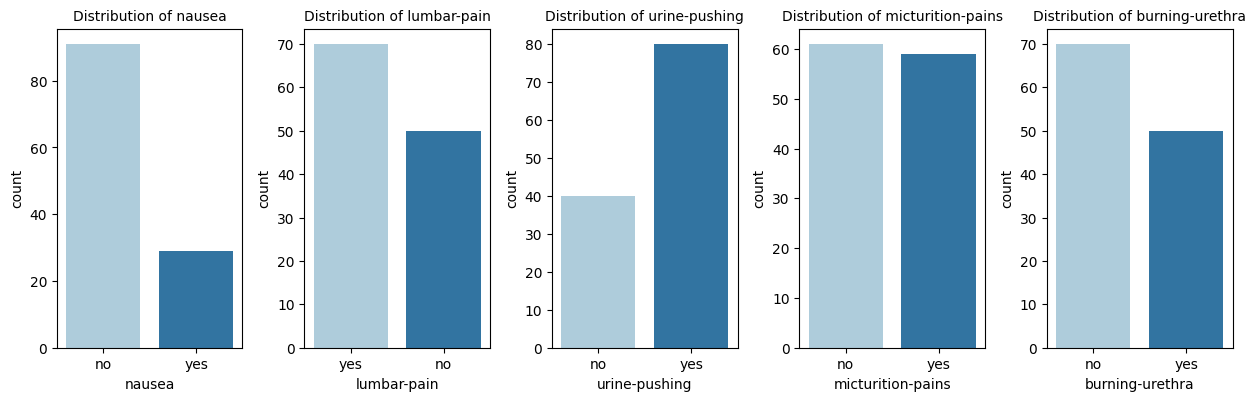

In [ ]:
plt.figure(figsize=(15, 15))

for i, col in enumerate (Binary_columns,1):
    plt.subplot(4, 6, i)
    sns.countplot(x=col, data=dataset, palette="Paired")
    plt.title(f"Distribution of {col}", fontsize=10)

plt.tight_layout()
plt.show()

Target variables count

In [ ]:
Target_columns = ['bladder-inflammation','nephritis']
for col in Target_columns:
    print(dataset[col].value_counts())

bladder-inflammation
no     61
yes    59
Name: count, dtype: int64
nephritis
no     70
yes    50
Name: count, dtype: int64


<ipython-input-40-94a47c8f8b97>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataset, palette="Set1")
<ipython-input-40-94a47c8f8b97>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataset, palette="Set1")


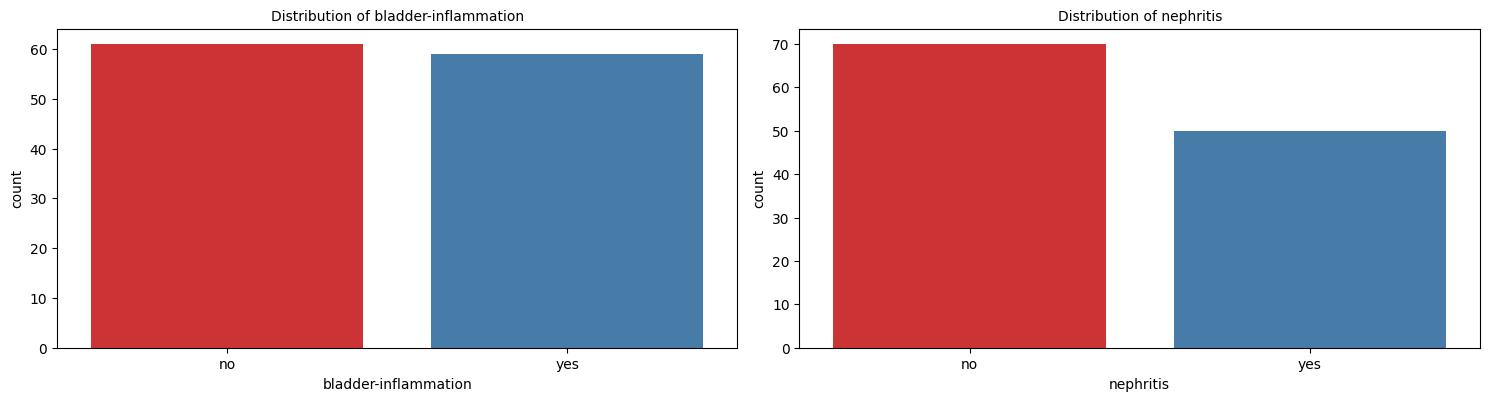

In [ ]:
plt.figure(figsize=(15, 15))

for i, col in enumerate (Target_columns,1):
    plt.subplot(4, 2, i)
    sns.countplot(x=col, data=dataset, palette="Set1")
    plt.title(f"Distribution of {col}", fontsize=10)

plt.tight_layout()
plt.show()

Plot Between Features and Target (bladder-inflammation) - Relationship

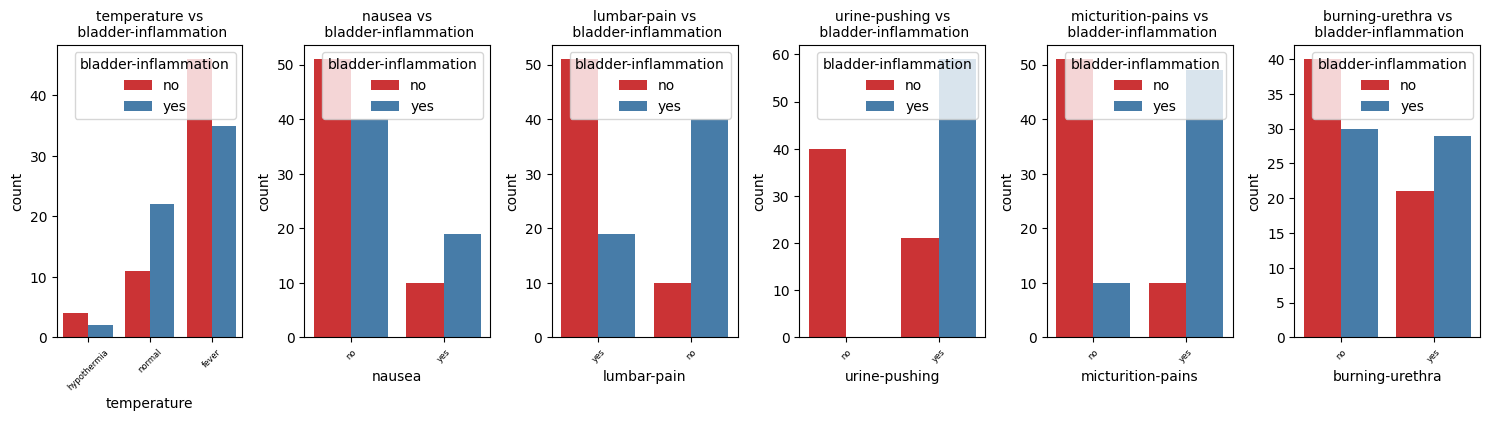

In [ ]:
Features = ['temperature','nausea','lumbar-pain','urine-pushing', 'micturition-pains', 'burning-urethra']
plt.figure(figsize=(15, 15))

for i, feature in enumerate(Features, 1):
    plt.subplot(4, 6, i)  # Adjust rows and columns
    sns.countplot(x=feature, hue='bladder-inflammation', data=dataset, palette="Set1")
    plt.title(f"{feature} vs\n bladder-inflammation", fontsize = 10)
    plt.xlabel(f"{feature}", fontsize=10)
    plt.xticks(rotation=45)
    plt.xticks(fontsize=6)

plt.tight_layout()
plt.show()

Plot Between Features and Target (nephritis) - Relationship

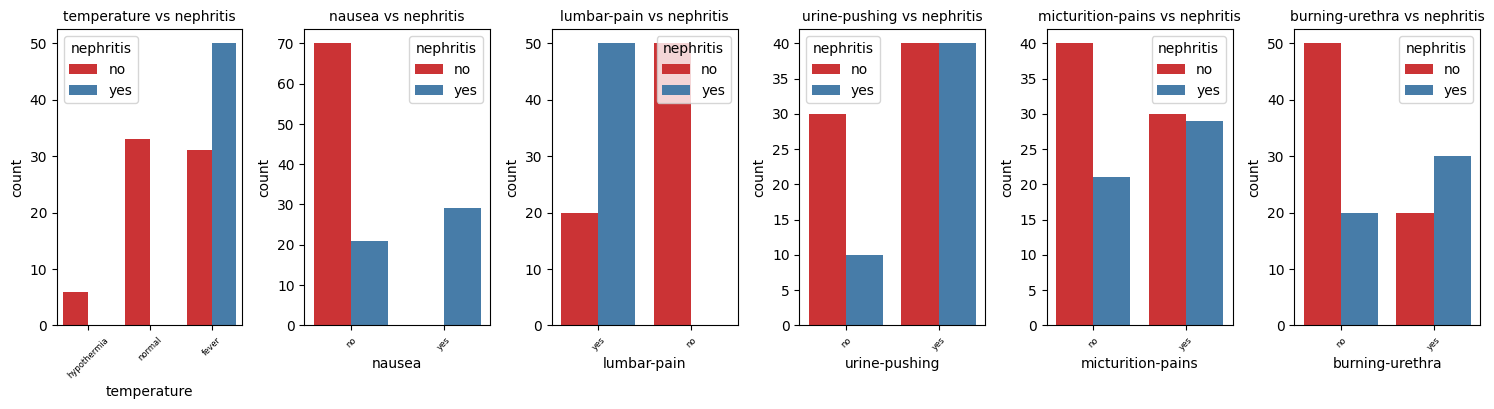

In [ ]:
plt.figure(figsize=(15, 15))

for i, feature in enumerate(Features, 1):
    plt.subplot(4, 6, i)  # Adjust rows and columns
    sns.countplot(x=feature, hue='nephritis', data=dataset, palette="Set1")
    plt.title(f"{feature} vs nephritis", fontsize = 10)
    plt.xlabel(f"{feature}", fontsize=10)
    plt.xticks(rotation=45)
    plt.xticks(fontsize=6)

plt.tight_layout()
plt.show()

# Chi-square test

Encode columns (0,1,2)

In [ ]:
new_label = LabelEncoder()
data_encoded = dataset.copy()
label_mappings = {}

for col in data_encoded.columns:
    new_label.fit(data_encoded[col])
    data_encoded[col] = new_label.fit_transform(data_encoded[col])
    label_mappings[col] = dict(zip(new_label.classes_, new_label.transform(new_label.classes_)))

# Mapping values
for feature, mapping in label_mappings.items():
    print(f"Feature: {feature}")
    print("Original---> Encoded:")
    for original, encoded in mapping.items():
        print(f"  {original} -> {encoded}")
    print("\n")

Feature: temperature
Original---> Encoded:
  fever -> 0
  hypothermia -> 1
  normal -> 2


Feature: nausea
Original---> Encoded:
  no -> 0
  yes -> 1


Feature: lumbar-pain
Original---> Encoded:
  no -> 0
  yes -> 1


Feature: urine-pushing
Original---> Encoded:
  no -> 0
  yes -> 1


Feature: micturition-pains
Original---> Encoded:
  no -> 0
  yes -> 1


Feature: burning-urethra
Original---> Encoded:
  no -> 0
  yes -> 1


Feature: bladder-inflammation
Original---> Encoded:
  no -> 0
  yes -> 1


Feature: nephritis
Original---> Encoded:
  no -> 0
  yes -> 1




**For Nephritis**

Chi-square test

In [ ]:
for feature in data_encoded.drop(columns=['nephritis', 'bladder-inflammation']).columns:  # Exclude target columns
    crosstab = pd.crosstab(data_encoded[feature], data_encoded['nephritis']) #For nephritis
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print (feature)
    print (crosstab)
    print(f"Chi-Square Test for {feature}:")
    print(f"Chi2 P-Value: {p}")
    print(f"RESULT:")
    if p < 0.05:
        print(f"  p < 0.05: There is a significant relationship between {feature} and nephritis.\n")
    else:
        print(f"  p >= 0.05: No significant relationship between {feature} and nephritis.\n")


temperature
nephritis     0   1
temperature        
0            31  50
1             6   0
2            33   0
Chi-Square Test for temperature:
Chi2 P-Value: 1.0923651436106077e-09
RESULT:
  p < 0.05: There is a significant relationship between temperature and nephritis.

nausea
nephritis   0   1
nausea           
0          70  21
1           0  29
Chi-Square Test for nausea:
Chi2 P-Value: 1.2409766885409853e-12
RESULT:
  p < 0.05: There is a significant relationship between nausea and nephritis.

lumbar-pain
nephritis     0   1
lumbar-pain        
0            50   0
1            20  50
Chi-Square Test for lumbar-pain:
Chi2 P-Value: 2.2265697314315614e-14
RESULT:
  p < 0.05: There is a significant relationship between lumbar-pain and nephritis.

urine-pushing
nephritis       0   1
urine-pushing        
0              30  10
1              40  40
Chi-Square Test for urine-pushing:
Chi2 P-Value: 0.015426068688276007
RESULT:
  p < 0.05: There is a significant relationship between urine

**For Bladder-inflammation**

In [ ]:
for feature in data_encoded.drop(columns=['nephritis', 'bladder-inflammation']).columns:  # Exclude target columns
    crosstab = pd.crosstab(data_encoded[feature], data_encoded['bladder-inflammation']) #For bladder-inflammation
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print (feature)
    print (crosstab)
    print(f"Chi-Square Test for {feature}:")
    print(f"Chi2 P-Value: {p}")
    print(f"RESULT:")
    if p < 0.05:
        print(f"  p < 0.05: There is a significant relationship between {feature} and bladder-inflammation.\n")
    else:
        print(f"  p >= 0.05: No significant relationship between {feature} and bladder-inflammation.\n")

temperature
bladder-inflammation   0   1
temperature                 
0                     46  35
1                      4   2
2                     11  22
Chi-Square Test for temperature:
Chi2 P-Value: 0.05514889873330718
RESULT:
  p >= 0.05: No significant relationship between temperature and bladder-inflammation.

nausea
bladder-inflammation   0   1
nausea                      
0                     51  40
1                     10  19
Chi-Square Test for nausea:
Chi2 P-Value: 0.07041268686822552
RESULT:
  p >= 0.05: No significant relationship between nausea and bladder-inflammation.

lumbar-pain
bladder-inflammation   0   1
lumbar-pain                 
0                     10  40
1                     51  19
Chi-Square Test for lumbar-pain:
Chi2 P-Value: 3.2980982867079064e-08
RESULT:
  p < 0.05: There is a significant relationship between lumbar-pain and bladder-inflammation.

urine-pushing
bladder-inflammation   0   1
urine-pushing               
0                     40   0
1 